# Problem Statement

**Food Delivery services like Zomato and Swiggy need to show the accurate time it will take to deliver your order to keep transparency with their customers. These companies use Machine Learning algorithms to predict the food delivery time based on how much time the delivery partners took for the same distance in the past.**

**To predict the food delivery time in real-time, we need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, we need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
import warnings
import folium # For graph visualize

# filter out warning messages
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("E:/Delivery-Time-Predictor/Data/main.csv")

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [6]:
df.info() # Some feature are having null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [7]:
# Check null value
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [9]:
# unique values in every column
for i in df.columns:
    print(f" no. of unique value in {i}  is   : {df[i].nunique()}")
    print("#######################################################")
    if (df[i].nunique()) < 8:
        print(f"           unique value are : {df[i].unique()}")
        print("***************************************************")
    else:
        pass

 no. of unique value in ID  is   : 45584
#######################################################
 no. of unique value in Delivery_person_ID  is   : 1320
#######################################################
 no. of unique value in Delivery_person_Age  is   : 22
#######################################################
 no. of unique value in Delivery_person_Ratings  is   : 28
#######################################################
 no. of unique value in Restaurant_latitude  is   : 657
#######################################################
 no. of unique value in Restaurant_longitude  is   : 518
#######################################################
 no. of unique value in Delivery_location_latitude  is   : 4373
#######################################################
 no. of unique value in Delivery_location_longitude  is   : 4373
#######################################################
 no. of unique value in Order_Date  is   : 44
#####################################################

In [10]:
# lets create some features with the help of our existing features
# Properly describing info


feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage=[]

for column in df.columns:
    feature.append(column)
    count.append(len(df[column])) # Length of data frame column
    missing.append(df[column].isnull().sum()) # Missing Value
    unique.append(df[column].nunique()) # Unique value
    missing_percentage.append((df[column].isnull().sum() / df.shape[0]) * 100) # Missing Percentage
    dtypes.append(df[column].dtypes) # Data type
    
dataframe=pd.DataFrame({'feature':feature,
             'count':count,
             'missing':missing,
             'nunique':unique,
              'missing_percentage':missing_percentage,
              'dtypes':dtypes
              
             }) 
dataframe.set_index('feature')

,count,missing,nunique,missing_percentage,dtypes
feature,,,,,
ID,45584,0,45584,0.000000,object
Delivery_person_ID,45584,0,1320,0.000000,object
Delivery_person_Age,45584,1854,22,4.067217,float64
Delivery_person_Ratings,45584,1908,28,4.185679,float64
Restaurant_latitude,45584,0,657,0.000000,float64
Restaurant_longitude,45584,0,518,0.000000,float64
Delivery_location_latitude,45584,0,4373,0.000000,float64
Delivery_location_longitude,45584,0,4373,0.000000,float64
Order_Date,45584,0,44,0.000000,object


## We  will remove the age column ,  age column is not important while analysis

In [11]:
df.drop('Delivery_person_Age',axis=1,inplace=True)

In [12]:
# dropping the id column

df.drop('ID',axis=1,inplace=True)

In [13]:
df.head()

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


## Changing the datetime column in datetime

In [14]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y") # String to date time format

In [15]:
df['Order_Date']

0       2022-02-12
1       2022-02-13
2       2022-03-04
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-03-11
45582   2022-03-07
45583   2022-03-02
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [16]:
# Extract the year month and day from order date
df['year']= df['Order_Date'].dt.year
df['month']= df['Order_Date'].dt.month
df['day']= df['Order_Date'].dt.day

In [17]:
df.head()

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,Fog,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12
1,KOCRES16DEL01,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,Sandstorms,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4
3,LUDHRES15DEL02,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [18]:
# removing th eorder_date column
df.drop('Order_Date',axis=1,inplace=True)

In [19]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'day'],
      dtype='object')

In [20]:
# removing the null value in the time ordered column
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [21]:
# Remove the null value rows where   Time_Orderd   column is empty
df.dropna(subset=['Time_Orderd'],inplace=True) #  dropna() method removes the rows that contains NULL values.

In [22]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Ratings         268
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             943
Festival                        219
City                           1144
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [23]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.', ':')# 12:00 (12.00 -> 12:00)

In [24]:
df['Time_Orderd'].sample(10)

45181    18:15
6929     20:40
2885     10:25
32301    08:45
16281    18:40
20777    23:50
35229    15:20
38891    17:20
43830    18:30
40911    17:25
Name: Time_Orderd, dtype: object

In [25]:

# 12:00 (12.00 -> 12:00) 
# Function

def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the  function 
df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [26]:
df['Time_Orderd'].sample(10)

33482    19:20
7703     10:50
35662    20:35
26225    19:35
19544    23:50
43138    19:30
3105     14:45
34013    17:50
3494     21:55
4639     17:15
Name: Time_Orderd, dtype: object

In [27]:
# Convert the Order_Time column to a time data type
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S',errors='ignore')

In [28]:
df['Time_Orderd']

0        21:55
1        14:55
2        17:30
3        09:20
4        19:50
         ...  
45579    11:35
45580    19:55
45581    23:50
45582    13:35
45583    17:10
Name: Time_Orderd, Length: 43853, dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43853 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           43853 non-null  object 
 1   Delivery_person_Ratings      43585 non-null  float64
 2   Restaurant_latitude          43853 non-null  float64
 3   Restaurant_longitude         43853 non-null  float64
 4   Delivery_location_latitude   43853 non-null  float64
 5   Delivery_location_longitude  43853 non-null  float64
 6   Time_Orderd                  43853 non-null  object 
 7   Time_Order_picked            43853 non-null  object 
 8   Weather_conditions           43853 non-null  object 
 9   Road_traffic_density         43853 non-null  object 
 10  Vehicle_condition            43853 non-null  int64  
 11  Type_of_order                43853 non-null  object 
 12  Type_of_vehicle              43853 non-null  object 
 13  multiple_deliveries  

In [30]:
# Creating new hour column
df['TimeOrder_Hour']=df['Time_Orderd'].str.split(':',expand=True)[0] # (12:00 -> 12, 00)


# replacing '0' with '00'  - both indicate 24th hr 
df['TimeOrder_Hour']=df['TimeOrder_Hour'].replace('0','00') # (12:0 -> 12:00)

# changing the datatype
df['TimeOrder_Hour']=df['TimeOrder_Hour'].astype('int32')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43853 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           43853 non-null  object 
 1   Delivery_person_Ratings      43585 non-null  float64
 2   Restaurant_latitude          43853 non-null  float64
 3   Restaurant_longitude         43853 non-null  float64
 4   Delivery_location_latitude   43853 non-null  float64
 5   Delivery_location_longitude  43853 non-null  float64
 6   Time_Orderd                  43853 non-null  object 
 7   Time_Order_picked            43853 non-null  object 
 8   Weather_conditions           43853 non-null  object 
 9   Road_traffic_density         43853 non-null  object 
 10  Vehicle_condition            43853 non-null  int64  
 11  Type_of_order                43853 non-null  object 
 12  Type_of_vehicle              43853 non-null  object 
 13  multiple_deliveries  

In [32]:
# order_minute column
df['TimeOrder_min']=df['Time_Orderd'].str.split(':',expand=True)[1] # Extract after : part

# changing the datatype
df['TimeOrder_min']=df['TimeOrder_min'].astype('int32')

In [33]:
df.head()

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min
0,DEHRES17DEL01,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,...,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55
1,KOCRES16DEL01,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,...,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30
3,LUDHRES15DEL02,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [34]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min'],
      dtype='object')

In [35]:
# In our TimeOrder_Hour columns
# 7AM - 12PM - breakfash
# 12PM - 15PM - lunch
# 15PM - 17PM - after lunch
# 17PM - 19PM -  evening snaks
# 19PM - 24PM - Dinner

##  For  time_order_picked Column 
- Do the same thing here as we have done in Time_Orderd

In [36]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.', ':')

In [37]:
# Define a lambda function with error handling
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [38]:
# Convert the Order_Time column to a time data type
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S',errors='ignore')

In [39]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(':',expand=True)[0]



# changing the datatype
df['Time_Order_picked_Hour']=df['Time_Order_picked_Hour'].astype('int32')

In [40]:

# order_minute
df['Time_Order_picked_min']=df['Time_Order_picked'].str.split(':',expand=True)[1]

# changing the datatype
df['Time_Order_picked_min']=df['Time_Order_picked_min'].astype('int32')

In [41]:
df.head()

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min
0,DEHRES17DEL01,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,...,No,Metropolitian,46,2022,2,12,21,55,22,10
1,KOCRES16DEL01,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,...,No,Metropolitian,23,2022,2,13,14,55,15,5
2,PUNERES13DEL03,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,...,No,Metropolitian,21,2022,3,4,17,30,17,40
3,LUDHRES15DEL02,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,...,No,Metropolitian,20,2022,2,13,9,20,9,30
4,KNPRES14DEL02,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,...,No,Metropolitian,41,2022,2,14,19,50,20,5


## Extracting city from delivery_person_id

In [42]:
# spiliting the Delivery_person_id  on the bases of "RES", this will give us the city name of delivery(First part)

# New column
df['Delivery_city']=df['Delivery_person_ID'].str.split('RES',expand=True)[0] # Getting the string part i.e. the first part with the help of str.strip

In [43]:
df.head()

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,...,Metropolitian,46,2022,2,12,21,55,22,10,DEH
1,KOCRES16DEL01,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,...,Metropolitian,23,2022,2,13,14,55,15,5,KOC
2,PUNERES13DEL03,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,...,Metropolitian,21,2022,3,4,17,30,17,40,PUNE
3,LUDHRES15DEL02,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,...,Metropolitian,20,2022,2,13,9,20,9,30,LUDH
4,KNPRES14DEL02,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,...,Metropolitian,41,2022,2,14,19,50,20,5,KNP


In [44]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [45]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Ratings         268
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             943
Festival                        219
City                           1144
Time_taken (min)                  0
year                              0
month                             0
day                               0
TimeOrder_Hour                    0
TimeOrder_min                     0
Time_Order_picked_Hour            0
Time_Order_picked_min             0
Delivery_city                     0
dtype: int64

In [46]:
df['Restaurant_latitude'].dtypes

dtype('float64')

In [47]:
df['Delivery_person_Ratings'].isnull().sum()

268

# Filling Delivery_person_Ratings column's null value with the mean 

In [48]:
# fillup the missing value in delivery_person_rating with the help of mean value of every delivery_person_id
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

In [49]:
# now the missing value is null
df['Delivery_person_Ratings'].isnull().sum()


0

# working with map

In [50]:
folium.Map(tiles="cartodb positron") # Load the world map

In [51]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city'],
      dtype='object')

### Restaurant_latitude & Restaurant_longitude

In [52]:
# plotting the lattitude and loggitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0, how='any', inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
# India data
# Resturant location in the map

In [53]:
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East


# this data set is realted to india. but in some of latitidude is given in negative(-), negative lattitude is related
# to indian ocean .. (So this are outliers)

# so that there is much chances that negative sign in lattitude is by mistake

In [54]:
# changing -ve to +ve latitude in  dataset(Either we can drop other wise we can change form - to +)
# As we have many lattitude we will just change from - to +
"""
abs() function return the absolute value. The absolute
value of any number is always positive it removes the negative sign of a number in Python.
"""
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

##### To calculate the distance between two points on a sphere (such as the Earth), we can use the Haversine formula

In [55]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [56]:
df['distance'].head() 

0    10.280582
1     6.242319
2    13.787860
3     2.930258
4    19.396618
Name: distance, dtype: float64

In [57]:
# df.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)
df.groupby(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'])['distance'].max().reset_index().head(40)


,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,distance
0,0.000000,0.000000,0.010000,0.010000,1.572534
1,0.000000,0.000000,0.020000,0.020000,3.145067
2,0.000000,0.000000,0.030000,0.030000,4.717601
3,0.000000,0.000000,0.040000,0.040000,6.290135
4,0.000000,0.000000,0.050000,0.050000,7.862668
5,0.000000,0.000000,0.060000,0.060000,9.435202
6,0.000000,0.000000,0.070000,0.070000,11.007735
7,0.000000,0.000000,0.080000,0.080000,12.580268
8,0.000000,0.000000,0.090000,0.090000,14.152801
9,0.000000,0.000000,0.110000,0.110000,17.297866


In [58]:
# Dropping rows where latitude and longitude are outside India's geographic bounds:
# Latitude of India: 8°4' N to 37°6' N
# Longitude of India: 68°7' E to 97°25' E

Latitude set to within the range

In [59]:
# Here 3509 record is of no use. bcz the wrong lattitude is mention
# low value
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].shape

(3509, 26)

In [60]:
# droping  where  restaurant_lattitude and delivery_location_latitude less than 8
df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].index)

In [61]:
# higher value lattitude
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


Longitude set within range 

In [62]:
# Low value
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [63]:
# High value
df[(df['Restaurant_longitude'] > 97) & (df['Delivery_location_longitude'] > 97)]

,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [64]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

### Minimum Distance 

In [65]:
min_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head(1)
min_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.83982,30.924057,75.84982


In [66]:
# Plot Graph of differnt distances
import folium
from branca.element import Figure

fig2 = Figure(width=850, height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant", icon=folium.Icon(color='purple', prefix='fa', icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Display the map
fig2.add_child(m)

# Add tile layers with attribution
folium.TileLayer('Stamen Terrain', attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL').add_to(m)
folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL').add_to(m)
folium.TileLayer('Stamen Water Color', attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL').add_to(m)
folium.TileLayer('cartodbpositron', attr='Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL').add_to(m)
folium.TileLayer('cartodbdark_matter', attr='Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL').add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)
m




# Maximum Distance

In [67]:
max_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
20.969489,25.443994,81.860187,25.583994,82.000187


In [68]:
tooltips=f"Distance: {df['distance'].max()} km"

In [69]:
import folium
from branca.element import Figure

# Create the figure object
fig2 = Figure(width=850, height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[25.443994, 81.860187], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[25.443994, 81.860187], popup="Restaurant", icon=folium.Icon(color='purple', prefix='fa', icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[25.583994, 82.000187], popup="Delivery").add_to(m)

# Draw a line between the two locations
tooltips = "Delivery Route"  # Add the tooltip text for the PolyLine
folium.PolyLine(locations=[[25.443994, 81.860187], [25.583994, 82.000187]], color='red', tooltip=tooltips).add_to(m)

# Add tile layers with proper attribution
folium.TileLayer('Stamen Terrain', attr="Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL").add_to(m)
folium.TileLayer('Stamen Toner', attr="Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL").add_to(m)
folium.TileLayer('Stamen Watercolor', attr="Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL").add_to(m)
folium.TileLayer('cartodbpositron', attr="Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL").add_to(m)
folium.TileLayer('cartodbdark_matter', attr="Map tiles by CartoDB, under CC BY 3.0. Data by OpenStreetMap, under ODbL").add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display the map
fig2.add_child(m)
m


In [70]:
# Plotting the latitude and longitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0, how='any', inplace=True)  # Removed thresh=None
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale, zoom=8, 
                        height=1000, width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()


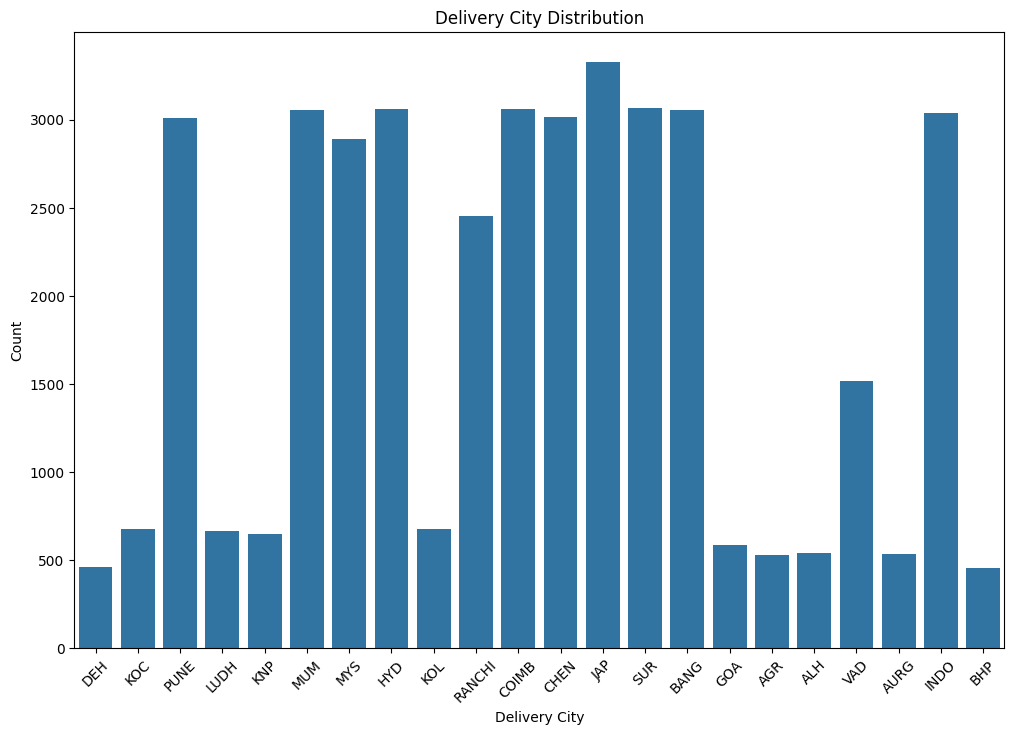

In [71]:
# delivery cities from where we get maximum order
# "Cities like Pune, Mumbai, Mysore, Hyderabad, Chennai, Bangalore, Indore, and Ranchi have a higher number of food orders."
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Delivery_city')  # Explicitly specify the `x` argument
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Delivery City Distribution')  # Title for the plot
plt.xlabel('Delivery City')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.show()

In [72]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

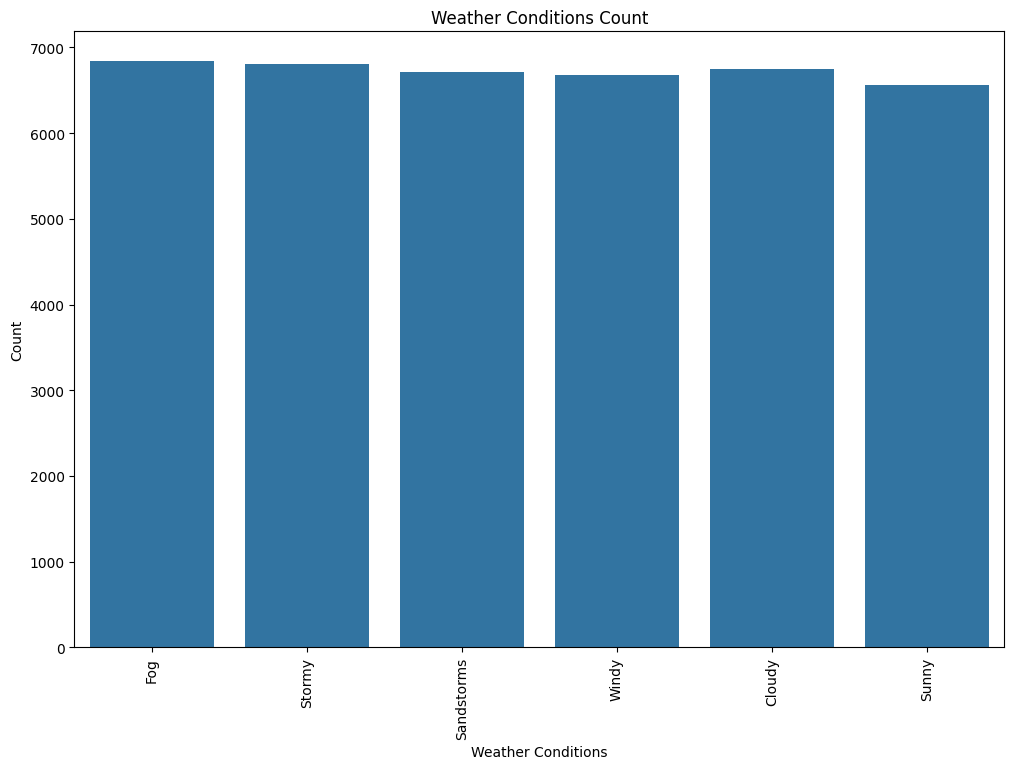

In [73]:
# Weather Condition(Mostly same)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Weather_conditions')

# Rotate x-axis labels
plt.xticks(rotation=90)  # To make sure labels are readable
plt.xlabel('Weather Conditions')  # Optional, for better axis labeling
plt.ylabel('Count')  # Optional, for better axis labeling
plt.title('Weather Conditions Count')  # Optional, for the plot title

# Show the plot
plt.show()

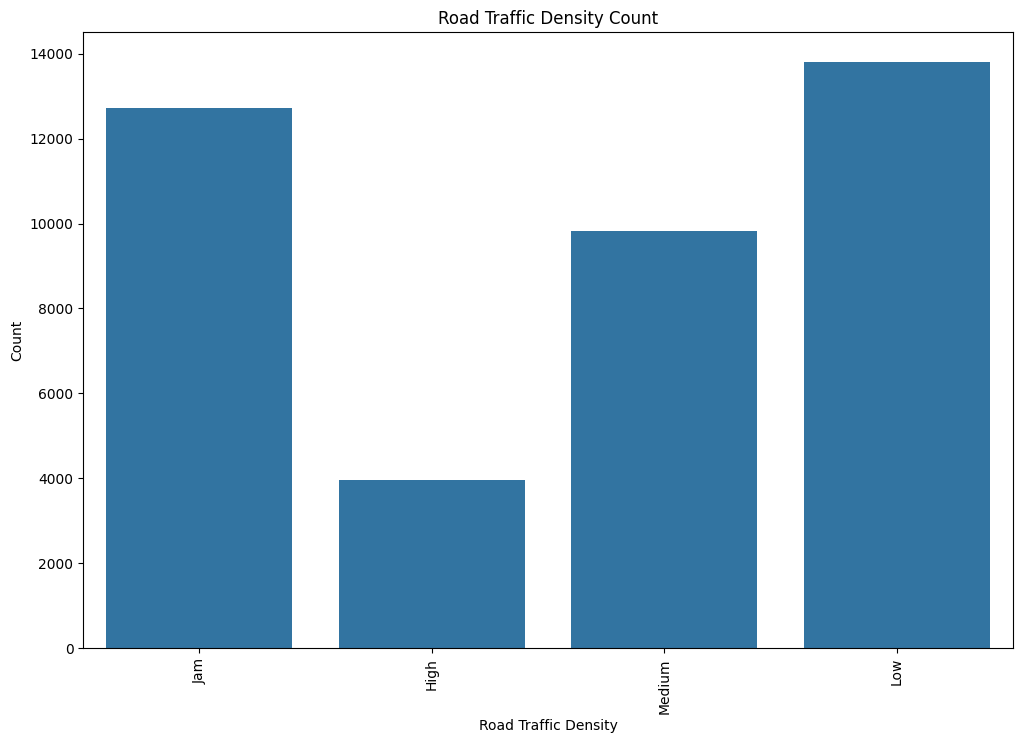

In [74]:
# Road_traffic_density
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for road traffic density
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Road_traffic_density')

# Rotate x-axis labels
plt.xticks(rotation=90)  # Rotate to make labels more readable
plt.xlabel('Road Traffic Density')  # Optional, for better axis labeling
plt.ylabel('Count')  # Optional, for better axis labeling
plt.title('Road Traffic Density Count')  # Optional, for the plot title

# Show the plot
plt.show()


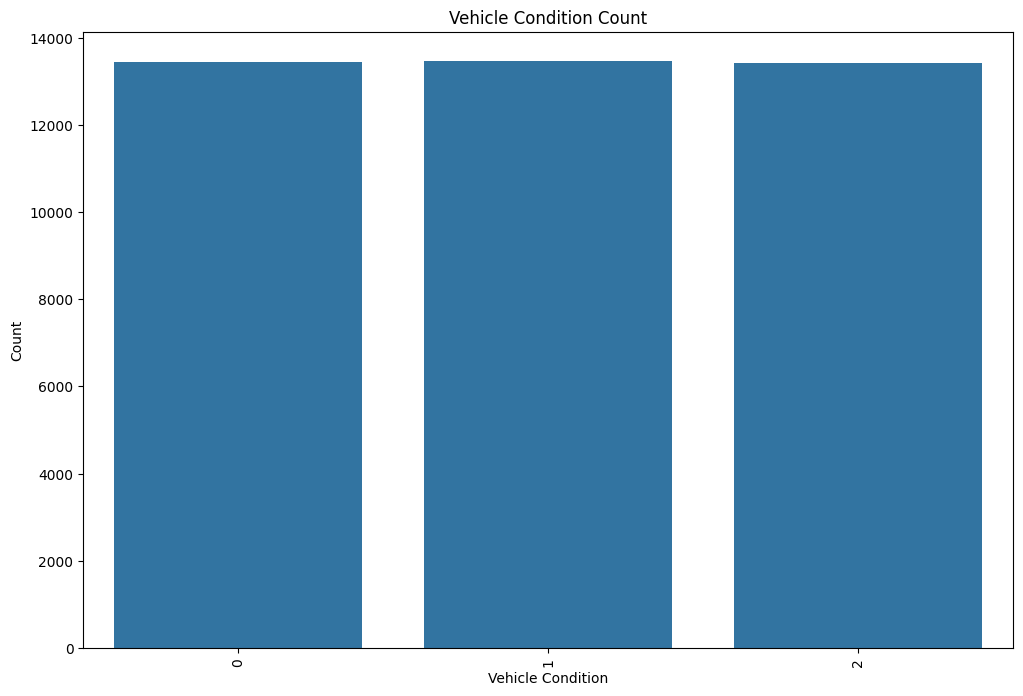

In [75]:
# Vehicle_condition
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for vehicle condition
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Vehicle_condition')

# Rotate x-axis labels
plt.xticks(rotation=90)  # Rotate to make labels more readable
plt.xlabel('Vehicle Condition')  # Optional, for better axis labeling
plt.ylabel('Count')  # Optional, for better axis labeling
plt.title('Vehicle Condition Count')  # Optional, for the plot title

# Show the plot
plt.show()


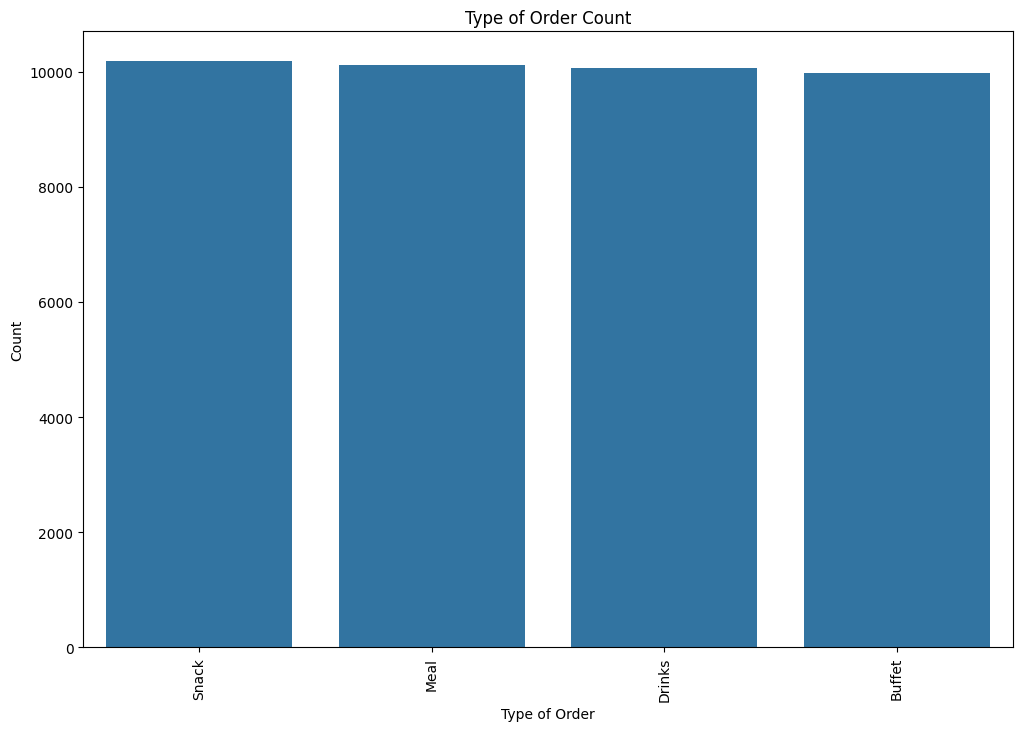

In [76]:
# Type_of_order
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for the type of order
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Type_of_order')

# Rotate x-axis labels
plt.xticks(rotation=90)  # Rotate to make labels more readable
plt.xlabel('Type of Order')  # Optional, for better axis labeling
plt.ylabel('Count')  # Optional, for better axis labeling
plt.title('Type of Order Count')  # Optional, for the plot title

# Show the plot
plt.show()


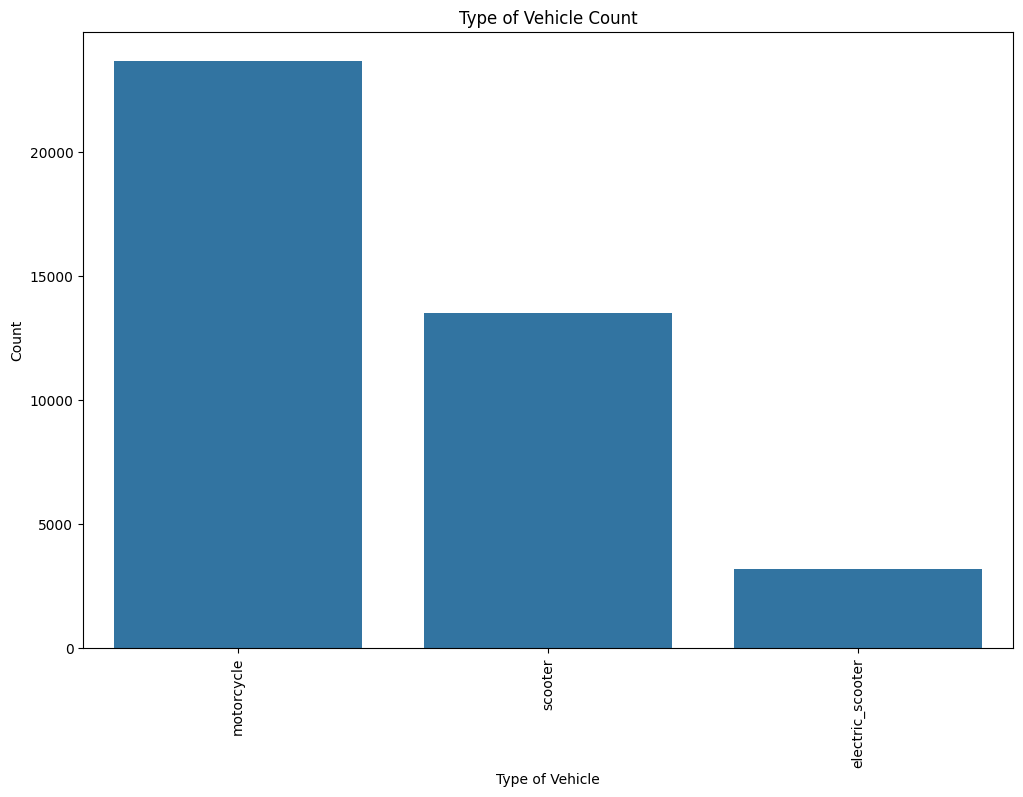

In [77]:
# Type_of_vehicle
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for the type of vehicle
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Type_of_vehicle')

# Rotate x-axis labels
plt.xticks(rotation=90)  # Rotate to make labels more readable
plt.xlabel('Type of Vehicle')  # Optional, for better axis labeling
plt.ylabel('Count')  # Optional, for better axis labeling
plt.title('Type of Vehicle Count')  # Optional, for the plot title

# Show the plot
plt.show()


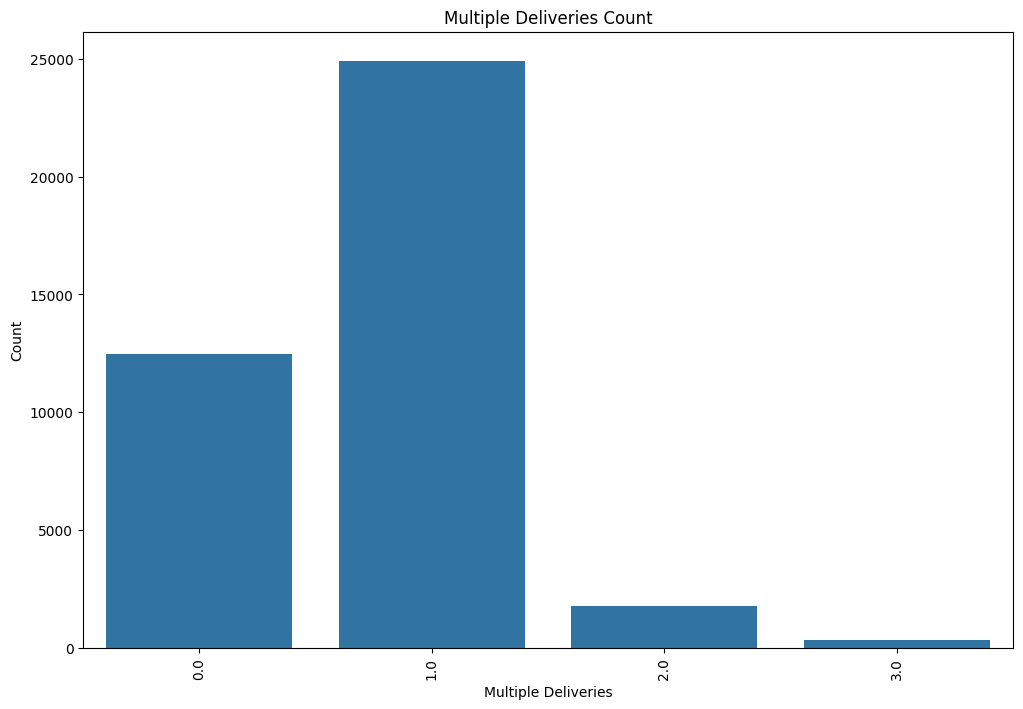

In [78]:
# multiple_deliveries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for multiple deliveries
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='multiple_deliveries')

# Rotate x-axis labels
plt.xticks(rotation=90)  # Rotate to make labels more readable
plt.xlabel('Multiple Deliveries')  # Optional, for better axis labeling
plt.ylabel('Count')  # Optional, for better axis labeling
plt.title('Multiple Deliveries Count')  # Optional, for the plot title

# Show the plot
plt.show()


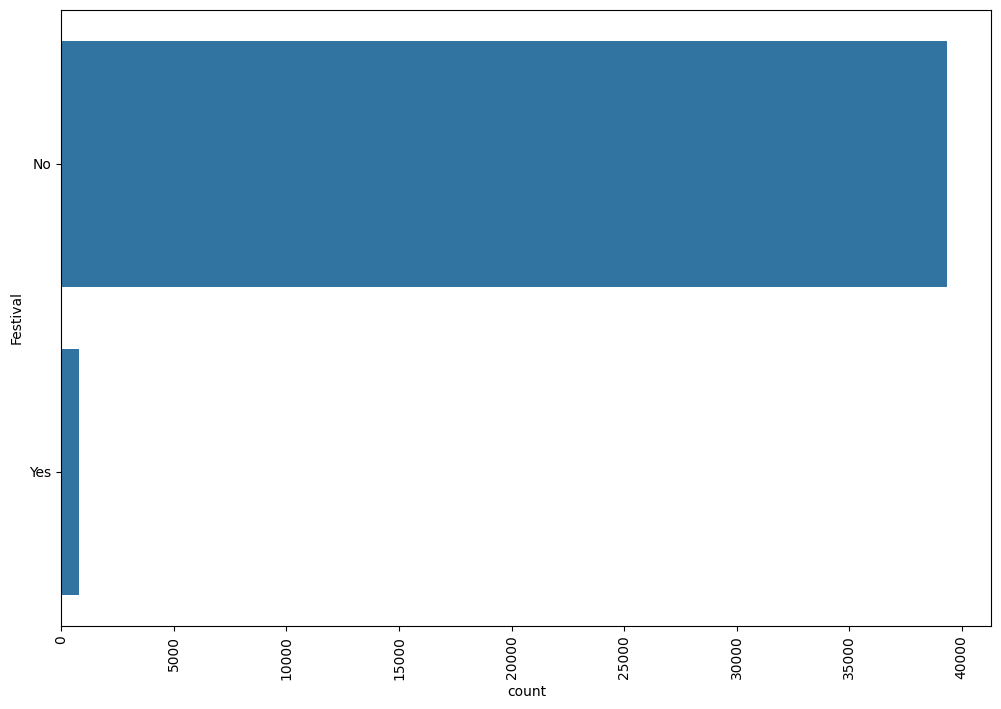

In [79]:
# Festival
plt.figure(figsize=(12,8))
sns.countplot(df['Festival'])
plt.xticks(rotation='vertical')
plt.show()

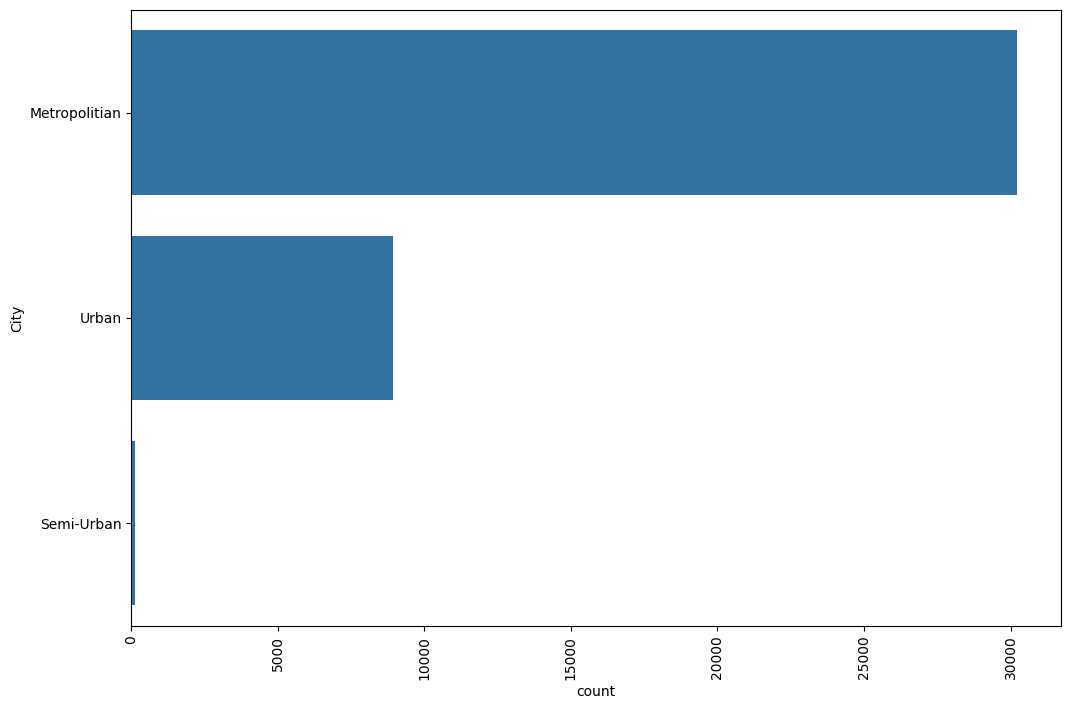

In [80]:
# City
plt.figure(figsize=(12,8))
sns.countplot(df['City'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# day
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(df['day'])
plt.xticks(rotation=90)  # Rotates x-axis labels by 90 degrees to make them vertical
plt.show()

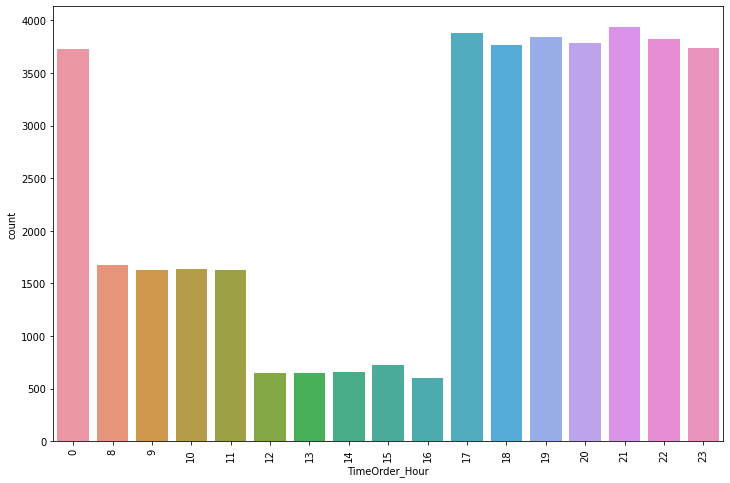

In [71]:
# TimeOrder_Hour
plt.figure(figsize=(12,8))

sns.countplot(df['TimeOrder_Hour'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
# more no. of order is b/w 8 -11 and eveing 5 to night 12
# people more ofter deliver food in the evening and morning time

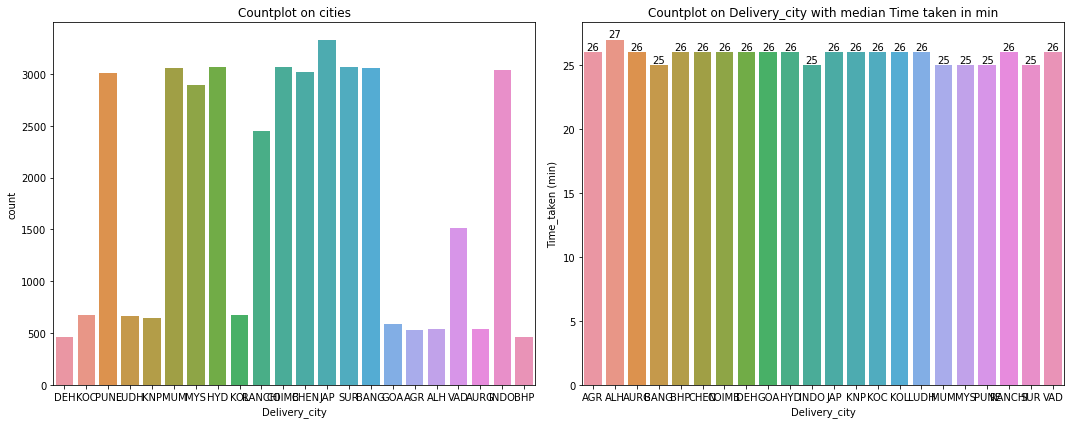

In [73]:
# plotting a countplot of Festival and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Delivery_city'])
plt.title("Countplot on cities")

plt.subplot(1,2,2)
data1 = df.groupby(['Delivery_city']).median().reset_index()
ax = sns.barplot(x='Delivery_city', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Delivery_city with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

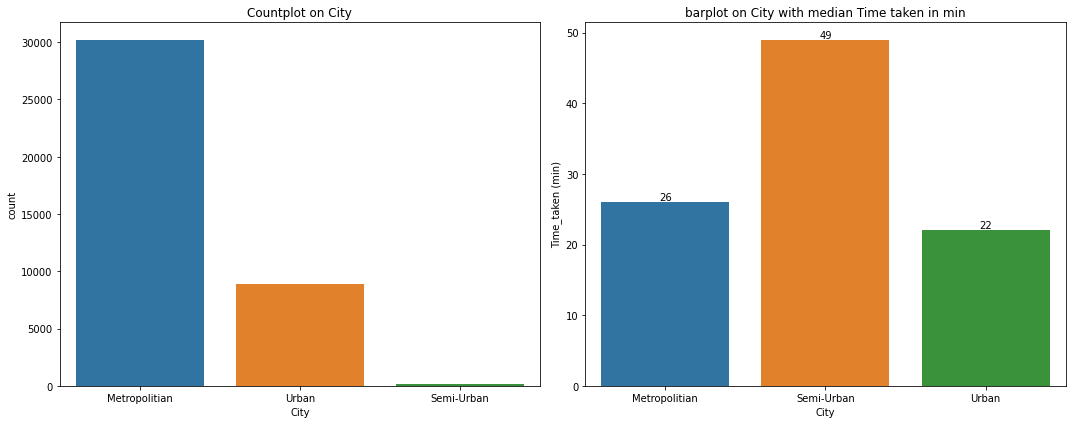

In [75]:
# plotting a countplot of City and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['City'])
plt.title("Countplot on City")

plt.subplot(1,2,2)
data1 = df.groupby(['City']).median().reset_index()
ax = sns.barplot(x='City', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('barplot on City with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

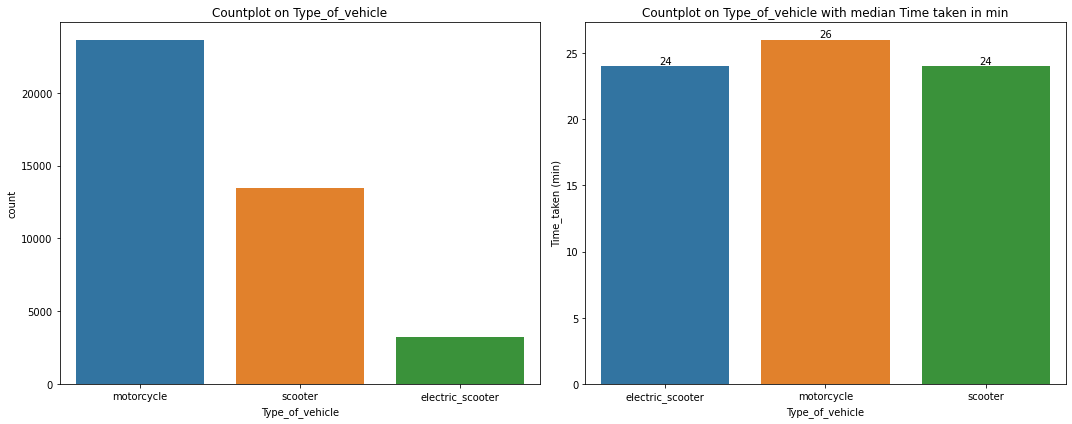

In [76]:
# plotting a countplot of Type_of_vehicle and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Type_of_vehicle'])
plt.title("Countplot on Type_of_vehicle")

plt.subplot(1,2,2)
data1 = df.groupby(['Type_of_vehicle']).median().reset_index()
ax = sns.barplot(x='Type_of_vehicle', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Type_of_vehicle with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

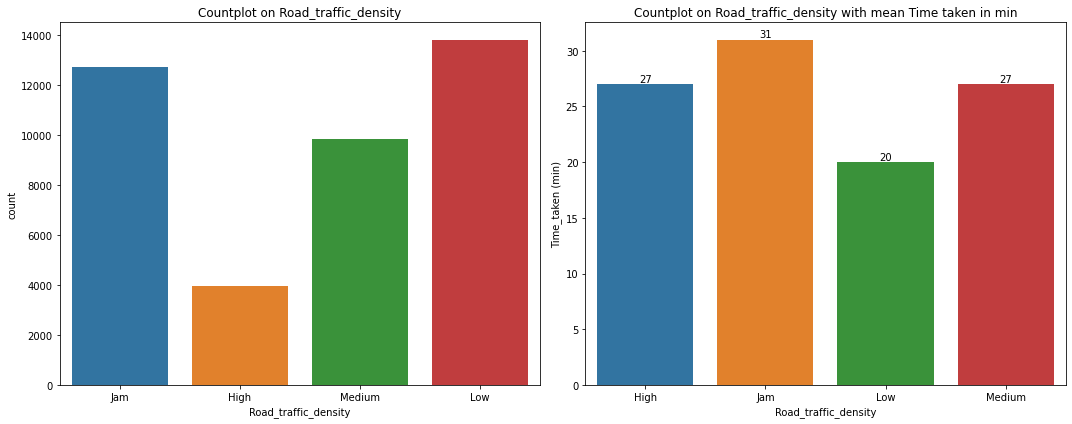

In [77]:
# plotting a countplot of Road traffic density and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Road_traffic_density'])
plt.title("Countplot on Road_traffic_density")

plt.subplot(1,2,2)
data1 = df.groupby(['Road_traffic_density']).median().reset_index()
ax = sns.barplot(x='Road_traffic_density', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Road_traffic_density with mean Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

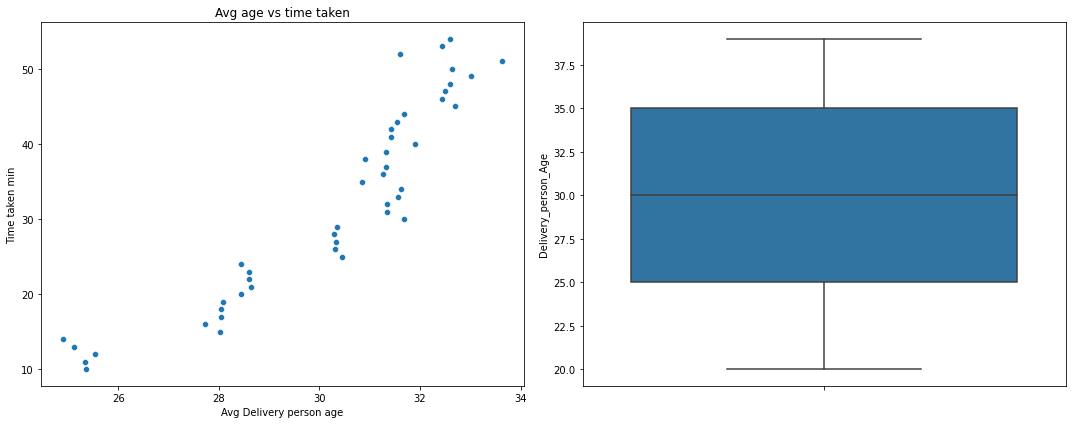

In [78]:
# The avg delivery person age w.r.t Time taken in min
# as the age is increses the time of delivery is also inc.
data1 = df.groupby(['Time_taken (min)']).mean().reset_index()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=data1)
plt.xlabel('Avg Delivery person age')
plt.ylabel("Time taken min")
plt.title('Avg age vs time taken')

plt.subplot(1,2,2)
sns.boxplot(y=df['Delivery_person_Age'])
plt.tight_layout()
plt.show()

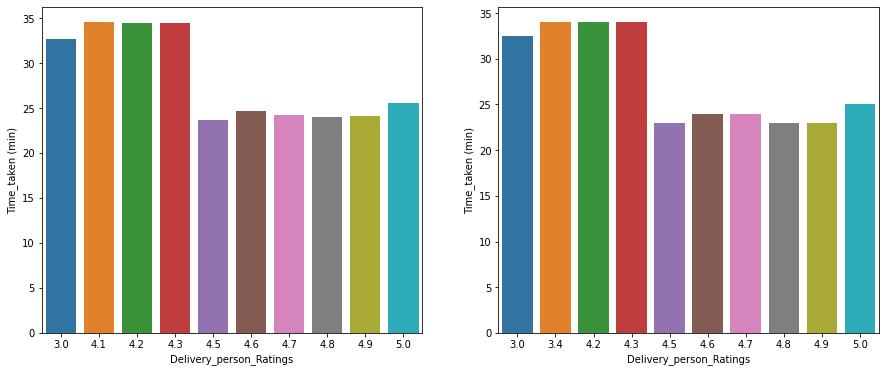

In [80]:
# person with lower rating is taking more time
data1 = df.groupby(['Delivery_person_Ratings']).mean().reset_index()
data1.sort_values('Time_taken (min)',inplace=True)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data1.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')

data2 = df.groupby(['Delivery_person_Ratings']).median().reset_index()
data2.sort_values('Time_taken (min)',inplace=True)
plt.subplot(1,2,2)
sns.barplot(data=data2.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')
plt.show()

In [74]:
# Numerical Feature 
numerical_feature=[feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_feature

['Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [75]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             855
Festival                        206
City                           1059
Time_taken (min)                  0
year                              0
month                             0
day                               0
TimeOrder_Hour                    0
TimeOrder_min                     0
Time_Order_picked_Hour            0
Time_Order_picked_min             0
Delivery_city                     0
distance                          0
dtype: int64

In [76]:
df['multiple_deliveries'].dtypes

dtype('float64')

In [77]:
# dropping delivery_person_id
df.drop('Delivery_person_ID',axis=1,inplace=True)

In [78]:
# dropping time ordered and time order_picked
df.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

In [79]:
df.columns

Index(['Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

In [80]:
df.head()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,...,46,2022,2,12,21,55,22,10,DEH,10.280582
1,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,...,23,2022,2,13,14,55,15,5,KOC,6.242319
2,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,...,21,2022,3,4,17,30,17,40,PUNE,13.787860
3,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,...,20,2022,2,13,9,20,9,30,LUDH,2.930258
4,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,...,41,2022,2,14,19,50,20,5,KNP,19.396618


In [81]:
df.dtypes

Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int32
month                            int32
day                              int32
TimeOrder_Hour                   int32
TimeOrder_min                    int32
Time_Order_picked_Hour           int32
Time_Order_picked_min            int32
Delivery_city                   object
distance                       float64
dtype: object

In [82]:
num_col=[feature for feature in df.columns if df[feature].dtypes != 'O'] # Numerical Column 
cat_col=[feature for feature in df.columns if df[feature].dtypes == 'O'] # Categorical column

In [83]:
num_col

['Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [84]:
cat_col

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City',
 'Delivery_city']

In [85]:
df.sample()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance
3103,4.5,11.025083,77.015393,11.135083,77.125393,Sunny,Medium,1,Buffet,scooter,...,25,2022,4,6,18,45,18,55,COIMB,17.137408


In [86]:
# Drop the column
df.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
        'year','month','day','TimeOrder_min','Time_Order_picked_Hour','Time_Order_picked_min'],axis=1,inplace=True)

In [87]:
df.head()

,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,DEH,10.280582
1,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,KOC,6.242319
2,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17,PUNE,13.787860
3,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
4,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,KNP,19.396618


# Spliting into x and y


In [101]:
x = df.drop(labels=['Time_taken (min)'],axis=1) # Independent
y = df[['Time_taken (min)']] # Dependent

In [102]:
df[cat_col].head()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Delivery_city
0,Fog,Jam,Snack,motorcycle,No,Metropolitian,DEH
1,Stormy,High,Meal,motorcycle,No,Metropolitian,KOC
2,Sandstorms,Medium,Drinks,scooter,No,Metropolitian,PUNE
3,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian,LUDH
4,Fog,Jam,Snack,scooter,No,Metropolitian,KNP


In [103]:
num_col=[feature for feature in df.columns if df[feature].dtypes != 'O']

In [104]:
df[num_col].head()

,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),TimeOrder_Hour,distance
0,4.2,2,3.0,46,21,10.280582
1,4.7,1,1.0,23,14,6.242319
2,4.7,1,1.0,21,17,13.787860
3,4.3,0,0.0,20,9,2.930258
4,4.7,1,1.0,41,19,19.396618


In [105]:
df[df['Road_traffic_density']=='Low'] # Check which traffic is low (Less traffic , less time required)

,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),TimeOrder_Hour,Delivery_city,distance
3,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,LUDH,2.930258
11,4.7,Sandstorms,Low,2,Meal,electric_scooter,0.0,No,Metropolitian,26,22,RANCHI,19.618739
12,5.0,Sandstorms,Low,1,Snack,motorcycle,1.0,No,Metropolitian,20,8,COIMB,1.558132
17,4.3,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,38,23,SUR,13.682045
19,4.8,Windy,Low,2,Buffet,electric_scooter,0.0,No,Urban,12,23,PUNE,16.853619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45569,4.9,Windy,Low,1,Snack,motorcycle,1.0,No,Metropolitian,26,10,COIMB,3.116127
45571,4.9,Sandstorms,Low,1,Snack,scooter,1.0,No,NaN,26,9,MYS,3.109134
45573,4.6,Cloudy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,20,0,PUNE,3.064267
45575,4.8,Sandstorms,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,20,9,CHEN,3.104827


This ranking is based on the potential danger and impact each condition may have on daily activities and travel. Stormy conditions can bring heavy rain, strong winds, and lightning, posing the highest risk. Sandstorms can cause respiratory problems and limit visibility, while fog and windy conditions can make driving hazardous. Cloudy conditions can indicate upcoming storms or weather changes, and sunny conditions are generally considered the least severe.

In [112]:
df.columns

Index(['Delivery_person_Ratings', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'TimeOrder_Hour', 'Delivery_city', 'distance'],
      dtype='object')

In [113]:
Road_traffic_density=['Low','Medium','High','Jam']
Weather_conditions=['Sunny','Cloudy','Windy','Fog','Sandstorms','Stormy']

In [124]:
categorical_column=['Type_of_order','Type_of_vehicle','Festival','City','Delivery_city']
ordinal_encod=['Road_traffic_density','Weather_conditions']
numerical_column=['Delivery_person_Ratings','Vehicle_condition','multiple_deliveries',
                  'TimeOrder_Hour','distance']

In [125]:
# numerical pipeline

numerical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value=0)), # fill the nan vale with zero
    ('scaler',StandardScaler(with_mean=False)) # Scaling of data
])

# categorical pipeline

categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')), # Replace with most frequent
    ('onehot',OneHotEncoder(handle_unknown='ignore')), # Category to numerical 
    ('scaler',StandardScaler(with_mean=False)) # Scaling of data
])


# ordinal pipeline

ordianl_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[Road_traffic_density,Weather_conditions])),
    ('scaler',StandardScaler(with_mean=False))   
])

In [126]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column),
    ('ordianl_pipeline',ordianl_pipeline,ordinal_encod)
])

In [127]:
# Split of data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [128]:
x_train=preprocessor.fit_transform(x_train)

In [129]:
x_test=preprocessor.transform(x_test)

In [130]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [131]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) # Calculate r2 score
    MAE = mean_absolute_error(true, predicted) # Calculate MAE
    MSE = mean_squared_error(true, predicted) # Calculate MSE
    rmse = np.sqrt(mean_squared_error(true, predicted))
   
    return r2, MAE , MSE,rmse

In [132]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "linear Regression": LinearRegression(),
    "Ridge":Ridge(),
 
  
}

r2_list=[]
mse_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    

    
    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)



    # Test set performance
    r2,MAE,MSE,rmse=evaluate_reg(y_test, y_test_pred)
    r2_train,MAE_train,MSE_train,rmse_train=evaluate_reg(y_train, y_train_pred)
    

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    

    
    print('Model performance for Test set')
    print('- r2_score: {:.4f}'.format(r2))
    print('- MAE: {:.4f}'.format(MAE))
    print('- MSE: {:.4f}'.format(MSE))
    print('- rmse: {:.4f}'.format(rmse))
    r2_list.append(r2)
    mse_list.append(MSE)
    
    print('-'*35)
        
    print('Model performance for train set')
    print('- r2_score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(MAE_train))
    print('- MSE: {:.4f}'.format(MSE_train))
    print('- rmse: {:.4f}'.format(rmse_train))

    print('='*35)
    print('='*35)
    print('\n')


Random Forest
Model performance for Test set
- r2_score: 0.7068
- MAE: 4.0104
- MSE: 26.1708
- rmse: 5.1157
-----------------------------------
Model performance for train set
- r2_score: 0.9594
- MAE: 1.4542
- MSE: 3.5472
- rmse: 1.8834


Decision Tree
Model performance for Test set
- r2_score: 0.4651
- MAE: 5.2544
- MSE: 47.7423
- rmse: 6.9096
-----------------------------------
Model performance for train set
- r2_score: 0.9999
- MAE: 0.0029
- MSE: 0.0119
- rmse: 0.1089


Gradient Boosting
Model performance for Test set
- r2_score: 0.6888
- MAE: 4.1769
- MSE: 27.7786
- rmse: 5.2705
-----------------------------------
Model performance for train set
- r2_score: 0.6980
- MAE: 4.0771
- MSE: 26.4174
- rmse: 5.1398


linear Regression
Model performance for Test set
- r2_score: 0.4852
- MAE: 5.4305
- MSE: 45.9531
- rmse: 6.7789
-----------------------------------
Model performance for train set
- r2_score: 0.4941
- MAE: 5.2964
- MSE: 44.2490
- rmse: 6.6520


Ridge
Model performance for Te

In [133]:
# Selecting the model
Results = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score'])
Results.sort_values(by=["r2_score"],ascending=False)

,Model Name,r2_score
0,Random Forest,0.706791
2,Gradient Boosting,0.688778
3,linear Regression,0.485157
4,Ridge,0.485150
1,Decision Tree,0.465111


In [134]:
Results = pd.DataFrame(list(zip(models_list, mse_list)), columns=['Model Name', 'Mse'])
Results.sort_values(by=["Mse"],ascending=True)

,Model Name,Mse
0,Random Forest,26.170841
2,Gradient Boosting,27.778554
3,linear Regression,45.953119
4,Ridge,45.953723
1,Decision Tree,47.742316


# Best model 
# random forest 